## Bank Customer Churn Prediction


### Changing the Directory :

In [9]:
import os
os.getcwd()

'C:\\Users\\shahe'

In [10]:

os.chdir(r'C:\Users\shahe\Desktop\Python\Project')
os.getcwd()

'C:\\Users\\shahe\\Desktop\\Python\\Project'

### Importing the Basic Required Libraries :

In [11]:
import warnings
warnings.filterwarnings("ignore") # To supress the unnecessary warnings.

import numpy as np               # For Mathematical Calculations
import pandas as pd              # For Data Processing or I/O
import seaborn as sns            # For Visualization
import matplotlib.pyplot as plt  # For Visualization

### Reading the Data

In [12]:
df=pd.read_csv(r"C:\Users\shahe\Desktop\Python\Project\Bank_Churn_Prediction_Data.csv",na_values='NA')

In [7]:
type(df)

pandas.core.frame.DataFrame

### Saving a Copy of Orginal Data by "Call by Value" method.

so,that changes made are not reflected on the Original data.

In [13]:
df_original = df[:]

In [67]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   
2       8 159660.80              3          1               0   
3       1      0.00              2          0               0   
4       2 125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

## UNDERSTANDING THE DATA

### Checking the Shape of the Data Frame.

In [204]:
print ( f" The Shape of the Data Set: {df.shape} \n")
print ( f" Number of Observations: {df.shape[0]}\n " )
print ( f" Number of Columns: {df.shape[1]}\n " )

 The Shape of the Data Set: (10000, 14) 

 Number of Observations: 10000
 
 Number of Columns: 14
 


### Checking for Duplicates

In [181]:
df.duplicated()  # No Duplicates found in this Data Set.

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

### Checking the Head and Tail of the Data Frame

In [13]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [14]:
df.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

### Checking for Number of Missising Values :

In [342]:
df.isnull().sum().sum()

0

In [206]:
df.apply(lambda x: sum(x.isnull())) # There are no Missing Values in this Data.

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Checking the Columns

In [207]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [208]:
#categrocial variables
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [209]:
#numerical variables
df_num=df.select_dtypes(exclude='object')# Just get me the numeric variables
df_num.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [211]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Renaming the Target Attribute from  'Exited' to 'CustomerStatus'

In [14]:
df=df.rename(columns={'Exited':'CustomerStatus'})

In [213]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   
2       8 159660.80              3          1               0   
3       1      0.00              2          0               0   
4       2 125510.82              1          1               1   

   EstimatedSalary  CustomerStatus  
0        101348.88               1  
1        112542.58               0  
2        113931.57               1  
3         93826.63               0  
4         79084.10               0

### Checking Unique levels of Variables and Count of their Non-Missing values

In [21]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [22]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [23]:
df["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [24]:
df["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [25]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [214]:
df["CustomerStatus"].value_counts()

0    7963
1    2037
Name: CustomerStatus, dtype: int64

### Changing Discrete Numerical variables to Categorical Variables

In [15]:
df["CustomerStatus"][df["CustomerStatus"]==1]="Exited"
df["CustomerStatus"][df["CustomerStatus"]==0]="Retained"

In [16]:
df["HasCrCard"][df["HasCrCard"]==1]="Yes"
df["HasCrCard"][df["HasCrCard"]==0]="No"


In [17]:
df["IsActiveMember"][df["IsActiveMember"]==1]="Active"
df["IsActiveMember"][df["IsActiveMember"]==0]="Inactive"



In [68]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
CustomerStatus      object
dtype: object

### Dropping the Column 'Row Number' as It is of no use

In [18]:
df.drop(labels=['RowNumber', 'Surname'], axis=1, inplace=True)

In [188]:
df.head()

CustomerId  CreditScore Geography  Gender  Age  Tenure    Balance  \
0    15634602          619    France  Female   42       2       0.00   
1    15647311          608     Spain  Female   41       1   83807.86   
2    15619304          502    France  Female   42       8  159660.80   
3    15701354          699    France  Female   39       1       0.00   
4    15737888          850     Spain  Female   43       2  125510.82   

   NumOfProducts HasCrCard IsActiveMember  EstimatedSalary CustomerStatus  
0              1       Yes         Active        101348.88         Exited  
1              1        No         Active        112542.58       Retained  
2              3       Yes       Inactive        113931.57         Exited  
3              2        No       Inactive         93826.63       Retained  
4              1       Yes         Active         79084.10       Retained

### Univariate Analysis : for Categorical Variables 

In [418]:
# Filter categorical variables

categorical_columns= {x for x in df.dtypes.index if df.dtypes[x]=='object'}

#Print frequencey of categories

for col in categorical_columns:
    print (f'\nFrequency of Categories for {col} column')
    print(df[col].value_counts())


Frequency of Categories for HasCrCard column
Yes    7055
No     2945
Name: HasCrCard, dtype: int64

Frequency of Categories for Geography column
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Frequency of Categories for Gender column
Male      5457
Female    4543
Name: Gender, dtype: int64

Frequency of Categories for IsActiveMember column
Active      5151
Inactive    4849
Name: IsActiveMember, dtype: int64

Frequency of Categories for CustomerStatus column
Retained    7963
Exited      2037
Name: CustomerStatus, dtype: int64


### Visualization  : Pie Chart or Bar chart

In [81]:
CS=df['CustomerStatus'].value_counts()
CS

Retained    7963
LeftBank    2037
Name: CustomerStatus, dtype: int64

In [82]:
type(CS)

pandas.core.series.Series

Text(0.5, 1, 'Bar chart for Customer Status')

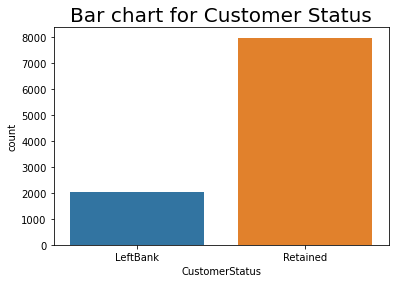

In [83]:
sns.countplot(df['CustomerStatus'])
plt.title("Bar chart for Customer Status", y=1, fontdict={"fontsize": 20})

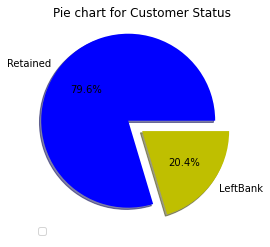

In [89]:
values = [CS[0],CS[1]]
colors = ['b', 'y']
labels = ['Retained','LeftBank']
explode = (0.2, 0)
plt.title('Pie chart for Customer Status')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)
#Percentage

plt.show()

In [419]:
G=df['Geography'].value_counts()


Text(0.5, 1, 'Bar chart for Geography')

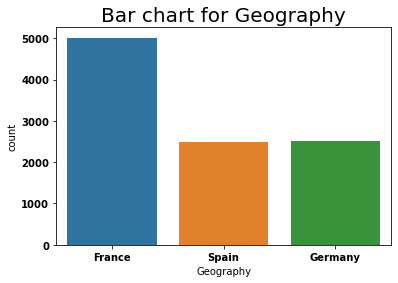

In [420]:
sns.countplot(df['Geography'])
plt.title("Bar chart for Geography", y=1, fontdict={"fontsize": 20})

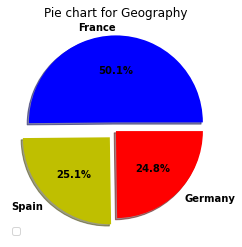

In [421]:
values = [G[0],G[1],G[2]]
colors = ['b', 'y','r']
labels = ['France','Spain','Germany']
explode = (0.1, 0.1, 0)
plt.title('Pie chart for Geography')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)
#Percentage

plt.show()

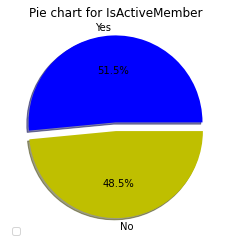

In [122]:
values = [IAM[0],IAM[1]]
colors = ['b', 'y']
labels = ['Yes','No']
explode = (0.1, 0)
plt.title('Pie chart for IsActiveMember')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)
#Percentage

plt.show()

In [123]:
Gd=df['Gender'].value_counts()

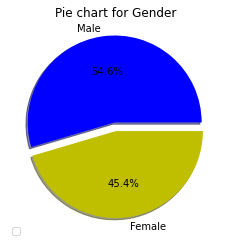

In [124]:
values = [Gd[0],Gd[1]]
colors = ['b', 'y']
labels = ['Male','Female']
explode = (0.1, 0)
plt.title('Pie chart for Gender')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)
#Percentage

plt.show()

In [126]:
H=df['HasCrCard'].value_counts()

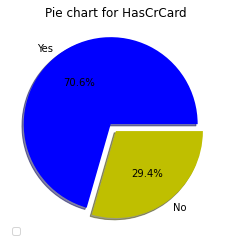

In [127]:
values = [H[0],H[1]]
colors = ['b', 'y']
labels = ['Yes','No']
explode = (0.1, 0)
plt.title('Pie chart for HasCrCard')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)
#Percentage

plt.show()

### Univariate Analysis for Numerical Variables :

In [111]:
# Filter Numerical variables

numerical_columns= {x for x in df.dtypes.index if df.dtypes[x]!='object'}

#Print frequencey of Numeric columns for each unique level

for col in numerical_columns:
    print (f'\nFrequency of Numberic variable {col}')
    print(df[col].value_counts())


Frequency of Numberic variable CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64

Frequency of Numberic variable Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

Frequency of Numberic variable Balance
0.00         3617
105473.74       2
130170.82       2
113063.83       1
80242.37        1
             ... 
183555.24       1
137648.41       1
112689.95       1
115465.28       1
74681.90        1
Name: Balance, Length: 6382, dtype: int64

Frequency of Numberic variable EstimatedSalary
24924.92     2
109029.72    1
182025.95    1
82820.85     1
30314.04     1
            ..
158302.59    1
171037.63    1
43036.60     1
55034.02     1
104181.78    1
Name: EstimatedSalary, Length: 9999, dtype: int64

Frequency of Numberic variable Tenure
2     1048
1     1035
7   

In [267]:
df[["CreditScore","Age","Balance","EstimatedSalary","Tenure","NumOfProducts"]].describe()

CreditScore           Age        Balance  EstimatedSalary  \
count  10000.000000  10000.000000   10000.000000     10000.000000   
mean     650.528800     38.921800   76485.889288    100090.239881   
std       96.653299     10.487806   62397.405202     57510.492818   
min      350.000000     18.000000       0.000000        11.580000   
25%      584.000000     32.000000       0.000000     51002.110000   
50%      652.000000     37.000000   97198.540000    100193.915000   
75%      718.000000     44.000000  127644.240000    149388.247500   
max      850.000000     92.000000  250898.090000    199992.480000   

             Tenure  NumOfProducts  
count  10000.000000   10000.000000  
mean       5.012800       1.530200  
std        2.892174       0.581654  
min        0.000000       1.000000  
25%        3.000000       1.000000  
50%        5.000000       1.000000  
75%        7.000000       2.000000  
max       10.000000       4.000000

In [112]:
df['CreditScore'].describe() # No Outliers found

count   10000.00
mean      650.53
std        96.65
min       350.00
25%       584.00
50%       652.00
75%       718.00
max       850.00
Name: CreditScore, dtype: float64

<AxesSubplot:ylabel='CreditScore'>

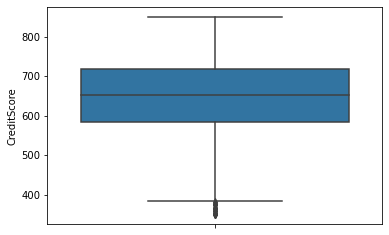

In [119]:
sns.boxplot( y=df['CreditScore'] )

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

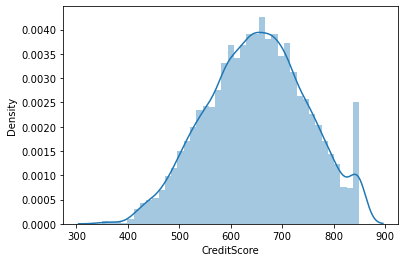

In [120]:
sns.distplot(df['CreditScore']) # Distribution is Normal , As it shows Bell Shaped curve

In [128]:
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)#UIF=upper inner fence
    LIF=Q1-1.5*(IQR) #LIF=lower inner fence
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

count    15.00
mean    361.33
std      11.36
min     350.00
25%     350.00
50%     359.00
75%     370.00
max     382.00
Name: CreditScore, dtype: float64

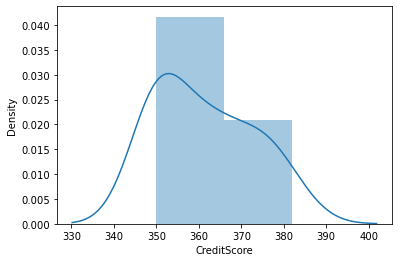

In [129]:
outlier_analysis('CreditScore')

In [113]:
df['Age'].describe()

count   10000.00
mean       38.92
std        10.49
min        18.00
25%        32.00
50%        37.00
75%        44.00
max        92.00
Name: Age, dtype: float64

<AxesSubplot:ylabel='Age'>

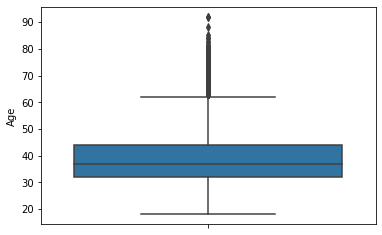

In [130]:
sns.boxplot( y=df['Age'] )

In [114]:
df['Balance'].describe()

count    10000.00
mean     76485.89
std      62397.41
min          0.00
25%          0.00
50%      97198.54
75%     127644.24
max     250898.09
Name: Balance, dtype: float64

<AxesSubplot:ylabel='Balance'>

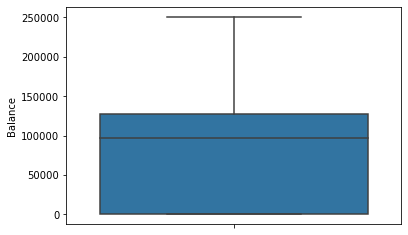

In [131]:
sns.boxplot( y=df['Balance'] )

In [116]:
df['EstimatedSalary'].describe()

count    10000.00
mean    100090.24
std      57510.49
min         11.58
25%      51002.11
50%     100193.91
75%     149388.25
max     199992.48
Name: EstimatedSalary, dtype: float64

<AxesSubplot:ylabel='EstimatedSalary'>

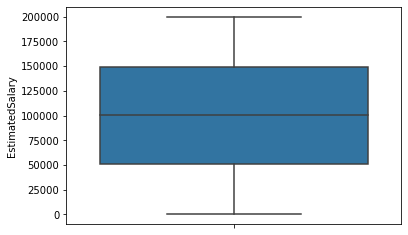

In [132]:
sns.boxplot( y=df['EstimatedSalary'] )

In [117]:
df['Tenure'].describe()

count   10000.00
mean        5.01
std         2.89
min         0.00
25%         3.00
50%         5.00
75%         7.00
max        10.00
Name: Tenure, dtype: float64

<AxesSubplot:ylabel='Tenure'>

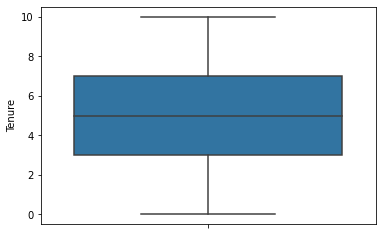

In [133]:
sns.boxplot( y=df['Tenure'] )

In [118]:
df['NumOfProducts'].describe()

count   10000.00
mean        1.53
std         0.58
min         1.00
25%         1.00
50%         1.00
75%         2.00
max         4.00
Name: NumOfProducts, dtype: float64

<AxesSubplot:ylabel='NumOfProducts'>

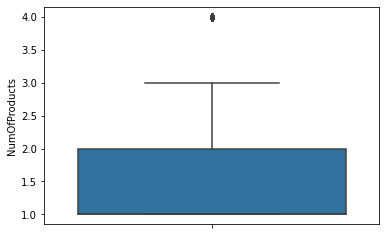

In [134]:
sns.boxplot( y=df['NumOfProducts'] )

In [271]:
df.sort_values(['Tenure','NumOfProducts','Age','CreditScore'],ascending=[False,False,True,False],inplace=True)
df.head()

CustomerId  CreditScore Geography  Gender  Age  Tenure   Balance  \
9215    15624180          584   Germany  Female   37      10  134171.8   
8590    15633194          771    France  Female   41      10  108309.0   
2509    15689341          655    France  Female   50      10       0.0   
4606    15784958          797    France  Female   55      10       0.0   
2600    15744582          680    France  Female   24      10       0.0   

      NumOfProducts HasCrCard IsActiveMember  EstimatedSalary CustomerStatus  
9215              4       Yes         Active         70927.11         Exited  
8590              4       Yes         Active        137510.41         Exited  
2509              4       Yes       Inactive        179267.94         Exited  
4606              4       Yes         Active         49418.87         Exited  
2600              3       Yes       Inactive        154971.63         Exited

## Bivariate Analysis & Multivariate Analysis

In [ ]:
Bivariate Analysis:

  Continouse Vs. Continouse   : For Visulaization scatter plot,...
                                For test of independence: pearson correlation or spearman or  ...
            
  Categorical Vs. Categorical : For summaraization: contingency table (two-way table)
                                For visualization :stacked bar chart,Grouped bar chart,...
                                For test of independence:chi-square test
  Continouse Vs. Categorical  : For summaraization:gropup by categorical column an aggregate for numerical column
                                For visualization: Grouped box plot,...
                                For test of independence :1) if categorical column has only two levels :t-test
                                                          2) if categorical column has more than two levels: ANOVA

### Continous Vs. Continous :
    
    Visualization : Scatter Plot
        
    Test of Independence : Pearson Correlation, Spearman Correlation or Kendel...

### Correlation of Continous Variables :

In [514]:
df.corr()

CustomerId  CreditScore   Age  Tenure  Balance  \
CustomerId             1.00         0.01  0.01   -0.01    -0.01   
CreditScore            0.01         1.00 -0.00    0.00     0.01   
Age                    0.01        -0.00  1.00   -0.01     0.03   
Tenure                -0.01         0.00 -0.01    1.00    -0.01   
Balance               -0.01         0.01  0.03   -0.01     1.00   
NumOfProducts          0.02         0.01 -0.03    0.01    -0.30   
EstimatedSalary        0.02        -0.00 -0.01    0.01     0.01   

                 NumOfProducts  EstimatedSalary  
CustomerId                0.02             0.02  
CreditScore               0.01            -0.00  
Age                      -0.03            -0.01  
Tenure                    0.01             0.01  
Balance                  -0.30             0.01  
NumOfProducts             1.00             0.01  
EstimatedSalary           0.01             1.00

### Subsetting the Dataset by Continous Variables :


In [ ]:
### Subsetting the Dataset by Continous Variables :

con_var=pd.read_csv(r"C:\Users\shahe\Desktop\Python\Project\Bank_Churn_Prediction_Data.csv",na_values='NA',
                    usecols=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary'])

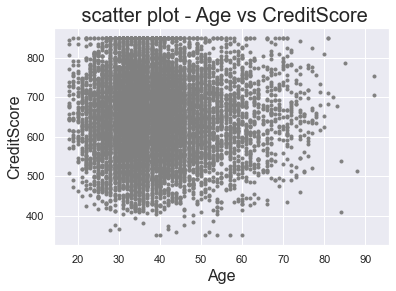

In [178]:
plt.scatter(df['Age'],df['CreditScore'], marker='.', color='grey')
 
plt.xlabel('Age', fontsize=16)
plt.ylabel('CreditScore', fontsize=16)
plt.title(' scatter plot - Age vs CreditScore',fontsize=20)
plt.show()

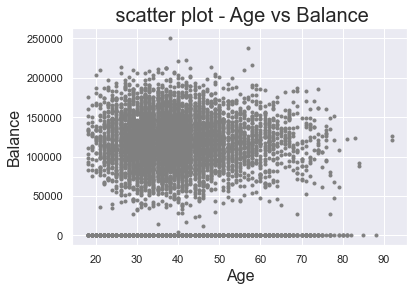

In [176]:
plt.scatter(df['Age'],df['Balance'], marker='.', color='grey')
 
plt.xlabel('Age', fontsize=16)
plt.ylabel('Balance', fontsize=16)
plt.title(' scatter plot - Age vs Balance',fontsize=20)
plt.show()

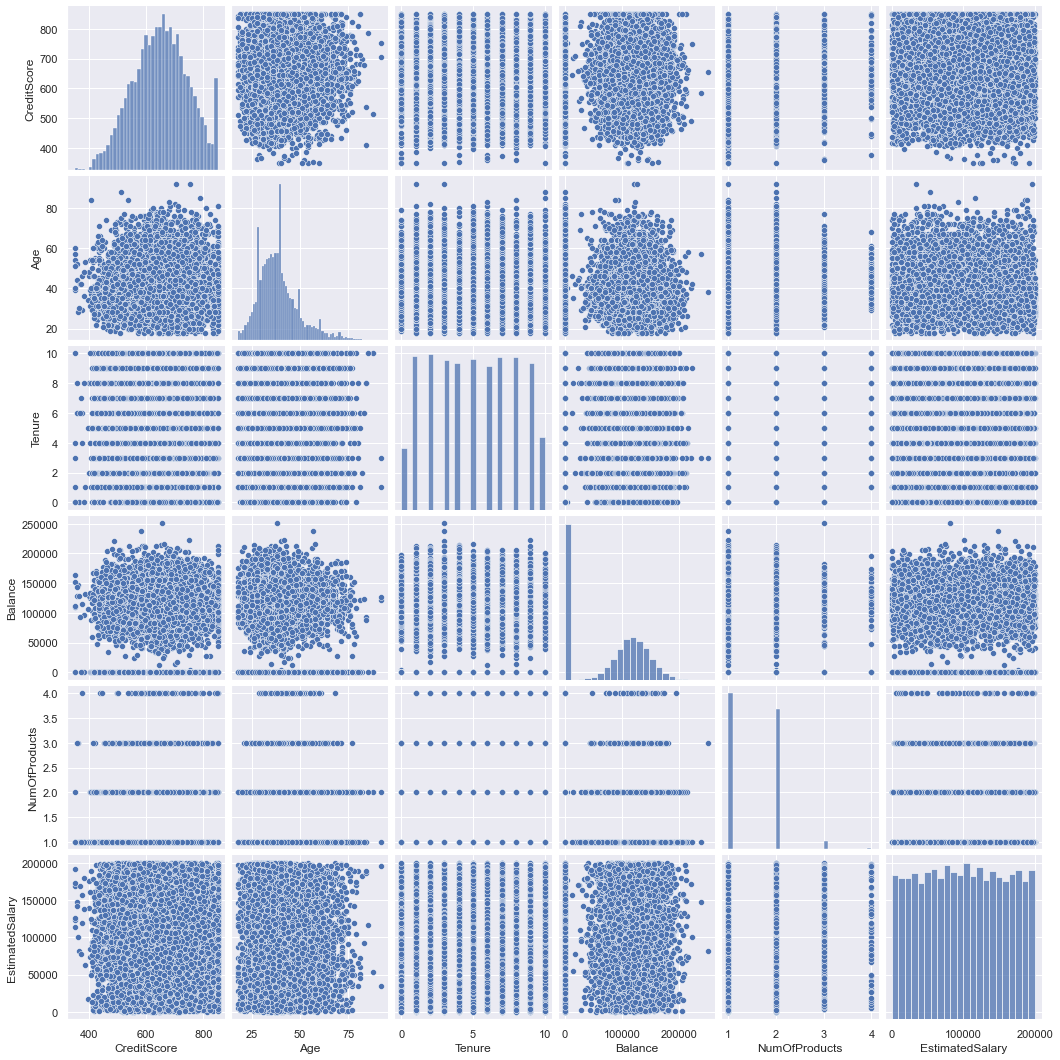

In [151]:
sns.pairplot(con_var)

## Bivariate Analysis  And MultiVariate Analysis :

In [263]:
A=df[(df['CustomerStatus']=="Exited")]
len(A)

2037

In [272]:
B=df[(df['CustomerStatus']=="Exited") & (df["Balance"]==0)]
len(B)

500

In [204]:
C=df[(df['CustomerStatus']=="Exited") & (df["Gender"]=="Female")]
len(C)

1139

In [291]:
D=df[(df['CustomerStatus']=="Exited") & (df["IsActiveMember"]=="Inactive")]
len(D)

1302

In [ ]:
To get Customers who are Female and Inactive left the Bank.

In [293]:
E=pd.merge(C,D)
len(E) # Inactive Female Exited

1302

In [300]:
F=pd.merge(B,G)
len(F) # Females with Balance '0' Exited

290

In [299]:
G=df[(df["Gender"]=="Female") & (df['Balance']==0)]
len(G) 

1654

In [298]:
H=pd.merge(C,G)
len(H) 

189

In [205]:
D=df[(df["Gender"]=="Female") & (df['Balance']==0)]
len(D)


1654

In [277]:
df['CustomerStatus'] =='Exited'
if df[['CustomerStatus'] == 'Exited']:
    #  First if statement
    if df[['Gender']=='Female']:
        print ("Female with 0 balance Exited ")
    # Nested - if statement
    # Will only be executed if statement above
    # it is true
    if df[['Balance']==0]: 
        print (""Male with 0 balance Exited "")
    else:
        print ("Conditions not met")

SyntaxError: invalid syntax (<ipython-input-277-f1f073ee82c6>, line 10)

In [196]:
C=df.groupby(["CustomerStatus","Gender"]).agg({'Balance':np.mean})
C

Balance
CustomerStatus Gender              
Exited         Female  89036.639359
               Male    93736.483742
Retained       Female  71183.249639
               Male    73911.607037

#### The Number of Females Exited is more than the Male.

In [279]:
a1=df.groupby(["CustomerStatus","Gender"]).agg({'Gender':np.size})
a1

Gender
CustomerStatus Gender        
Exited         Female    1139
               Male       898
Retained       Female    3404
               Male      4559

In [316]:
C=df[(df["CustomerStatus"]=="Exited") & (df["Age"] < 40) & (df["Gender"] == "Female")]
len(C)

342

In [317]:
D=df[(df["CustomerStatus"]=="Exited") & (df["Age"] < 40) & (df["Gender"] == "Male")]
len(D)

255

#### Females Above the Age of 40 are more prone to CHURN

In [318]:
E=df[(df["CustomerStatus"]=="Exited") & (df["Age"] > 40 ) & (df["Gender"] == "Female")]
len(E)

747

In [319]:
E=df[(df["CustomerStatus"]=="Exited") & (df["Age"] > 40 ) & (df["Gender"] == "Male")]
len(E)

604

In [365]:
G=df['Gender'].values


In [368]:
GD=np.unique(G)
GD

array(['Female', 'Male'], dtype=object)

In [372]:
GD[0]

'Female'

In [370]:
GD[1]

'Male'

In [364]:
np.unique(G)


array(['Gender'], dtype='<U6')

## Categorical Vs. Categorical :

Summerizing : By Contingency Table
    
Visualization : By Group Bar Chart or Stacked Bar chart
    
Test of Independence : Chi-Square Test

### Contingency Table for Bivariate Analysis :

In [441]:
contingency_table1 = pd.crosstab(df['CustomerStatus'],df['Gender'],margins = True)
contingency_table1

Gender          Female  Male    All
CustomerStatus                     
Exited            1139   898   2037
Retained          3404  4559   7963
All               4543  5457  10000

In [69]:
a1=df.groupby(["CustomerStatus","Geography"]).agg({'Gender':np.size, 'Age':np.mean})
a1

Gender        Age
CustomerStatus Geography                   
Exited         France        810  45.133333
               Germany       814  44.894349
               Spain         413  44.147700
Retained       France       4204  37.235966
               Germany      1695  37.311504
               Spain        2064  37.839147

In [402]:
a2=df.groupby(["CustomerStatus","Gender"]).agg({'Gender':np.size, 'Age':np.mean})
a2

Gender   Age
CustomerStatus Gender              
Exited         Female    1139 44.78
               Male       898 44.91
Retained       Female    3404 37.38
               Male      4559 37.43

### Visualization : Group Bar Chart

In [ ]:
CS=df['CustomerStatus'].values

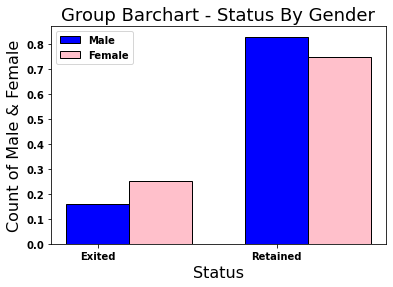

In [395]:
### Categorical Vs. Categorical (Customer Status & Gender)

CS=df['CustomerStatus'].values

# Checking which Gender has more frequency of CHURN.
labels = (CS[0],CS[1])

pos = np.arange(len(labels))
bar_width = 0.35
men_mean = [0.16, 0.83]
women_mean = [0.25, 0.75]

plt.bar(pos,men_mean,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,women_mean,bar_width,color='pink',edgecolor='black')
plt.xticks(pos, labels)
plt.xlabel('Status', fontsize=16)
plt.ylabel('Count of Male & Female', fontsize=16)
plt.title('Group Barchart - Status By Gender',fontsize=18)
plt.legend(Gender,loc=2)
plt.show()

Text(0.5, 1.0, 'Countplot-Geography Column')

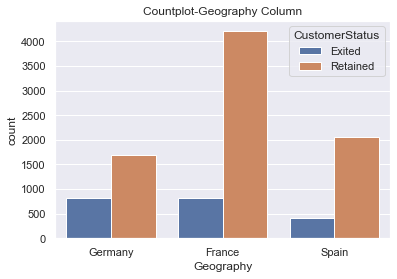

In [343]:
sns.countplot(x='Geography', hue = 'CustomerStatus',data = df).set_title('Countplot-Geography Column')

Text(0.5, 1.0, 'Countplot-IsActiveMember Column')

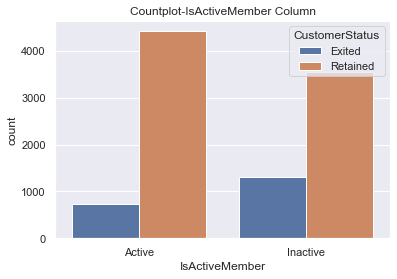

In [347]:
sns.countplot(x='IsActiveMember', hue = 'CustomerStatus',data = df).set_title('Countplot-IsActiveMember Column')
                                

In [122]:
a1=df.groupby(["CustomerStatus","Geography","Gender"]).agg({'Gender':np.size, 'Age':np.mean})
a1

Gender        Age
CustomerStatus Geography Gender                   
Exited         France    Female     460  45.332609
                         Male       350  44.871429
               Germany   Female     448  44.828125
                         Male       366  44.975410
               Spain     Female     231  43.610390
                         Male       182  44.829670
Retained       France    Female    1801  37.098834
                         Male      2403  37.338743
               Germany   Female     745  37.343624
                         Male       950  37.286316
               Spain     Female     858  38.011655
                         Male      1206  37.716418

In [125]:
G=np.unique(df['Geography'])#.values
G

array(['France', 'Germany', 'Spain'], dtype=object)

In [ ]:
Visualization :

In [127]:
G=df['Geography'].values

# Checking which Gender has more frequency of CHURN.
labels1 = (CS[0],CS[1])
labels2 = (G[0],G[1],G[2])

pos1 = np.arange(len(labels1))
pos2 = np.arange(len(labels2))
bar_width = 0.35
men_mean = [0.16, 0.83]
women_mean = [0.25, 0.75]

plt.bar(pos,men_mean,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,women_mean,bar_width,color='pink',edgecolor='black')
plt.xticks(pos1, ,labels2)
plt.yticks(pos2, ,labels1)
plt.xlabel('Status ', fontsize=16)
plt.ylabel('Contries', fontsize=16)
plt.title('Group Barchart - Status By Gender',fontsize=18)
plt.legend(Gender,loc=2)
plt.show()

SyntaxError: invalid syntax (<ipython-input-127-fba225721a72>, line 15)

### Test of Independence : 

In [37]:
from scipy.stats import chi2_contingency

chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df['CustomerStatus'],df['Gender'],margins = False))# make sure margins = False

print(exp_val)
print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

if p_val < 0.05:# consider significan level is 5%
    print("\nThere is some correlation between the two variables at significance level 0.05")
else:
    print("\nThere is no correlation between the two variables")

[[ 925.4091 1111.5909]
 [3617.5909 4345.4091]]

Chi-square is : 112.918571 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


### Defining a function for ChiSquare Test :

In [446]:
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False

    print(exp_val)
    print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at significance level 0.05")
    else:
        print("\nThere is no correlation between the two variables")

In [449]:
chi_square("CustomerStatus","Geography")

[[1021.3518  511.0833  504.5649]
 [3992.6482 1997.9167 1972.4351]]

Chi-square is : 301.255337 

p_value is : 0.000000 

degree of freedom is : 2

There is some correlation between the two variables at significance level 0.05


In [448]:
chi_square("Geography","Gender")

[[2277.8602 2736.1398]
 [1139.8387 1369.1613]
 [1125.3011 1351.6989]]

Chi-square is : 6.918160 

p_value is : 0.031459 

degree of freedom is : 2

There is some correlation between the two variables at significance level 0.05


In [453]:
chi_square("CustomerStatus","IsActiveMember")

[[1049.2587  987.7413]
 [4101.7413 3861.2587]]

Chi-square is : 242.985342 

p_value is : 0.000000 

degree of freedom is : 1

There is some correlation between the two variables at significance level 0.05


### Categorical Vs. Continous : 

Summerizing : By Groupby Categorical Variables and Aggregate by Continous Columns

Visualization : By Group Box Plot or Group Histogram

Test Of Independence : T- test if Categorical variable has only 2 levels,
                       Anova if Categorical variable has more than 2 levels.

In [452]:
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'CustomerStatus'],
      dtype='object')

### Summerizing : GroupBy Categorical Variables , Aggregate by Continous Variables

In [311]:
A1=df.groupby(["Geography","Gender","CustomerStatus","IsActiveMember"]).agg({'Gender':np.size,'Age':np.mean,
                                               'Balance':np.mean,'Tenure':np.mean,'CreditScore':np.mean})
A1                                                              

Gender        Age  \
Geography Gender CustomerStatus IsActiveMember                      
France    Female Exited         Active             172  45.191860   
                                Inactive           288  45.416667   
                 Retained       Active             990  38.774747   
                                Inactive           811  35.053021   
          Male   Exited         Active             126  44.888889   
                                Inactive           224  44.861607   
                 Retained       Active            1303  38.973139   
                                Inactive          1100  35.402727   
Germany   Female Exited         Active             165  44.733333   
                                Inactive           283  44.883392   
                 Retained       Active             394  38.284264   
                                Inactive           351  36.287749   
          Male   Exited         Active             131  45.000000   
                                Inactive           235  44.961702   
                 Retained       Active             558  38.661290   
                                Inactive           392  35.329082   
Spain     Female Exited         Active              77  43.311688   
                                Inactive           154  43.759740   
                 Retained       Active             486  39.709877   
                                Inactive           372  35.793011   
          Male   Exited         Active              64  44.703125   
                                Inactive           118  44.898305   
                 Retained       Active             685  39.328467   
                                Inactive           521  35.596929   

                                                      Balance    Tenure  \
Geography Gender CustomerStatus IsActiveMember                            
France    Female Exited         Active           67989.306686  4.941860   
                                Inactive         67615.326597  4.909722   
                 Retained       Active           58200.015939  4.939394   
                                Inactive         58698.109297  4.979038   
          Male   Exited         Active           69755.948651  4.968254   
                                Inactive         79060.447321  5.178571   
                 Retained       Active           60981.433784  4.973906   
                                Inactive         62713.931191  5.121818   
Germany   Female Exited         Active          119662.575818  4.963636   
                                Inactive        119680.458622  5.141343   
                 Retained       Active          119629.551726  4.697970   
                                Inactive        117929.344217  5.125356   
          Male   Exited         Active          121841.664656  4.732824   
                                Inactive        120845.798553  5.025532   
                 Retained       Active          119648.537545  4.935484   
                                Inactive        120249.537500  5.334184   
Spain     Female Exited         Active           82550.733117  4.532468   
                                Inactive         66721.143961  4.753247   
                 Retained       Active           58014.824300  5.018519   
                                Inactive         54739.654677  5.174731   
          Male   Exited         Active           71488.562500  4.000000   
                                Inactive         74078.677458  4.966102   
                 Retained       Active           65027.263825  5.074453   
                                Inactive         57722.659463  5.186180   

                                                CreditScore  
Geography Gender CustomerStatus IsActiveMember               
France    Female Exited         Active           644.180233  
                                Inactive         643.729167  
                 Retained       Active           653.6

### Visualization : Group Box Plot

In [83]:
sns.set()

<AxesSubplot:xlabel='Geography', ylabel='Tenure'>

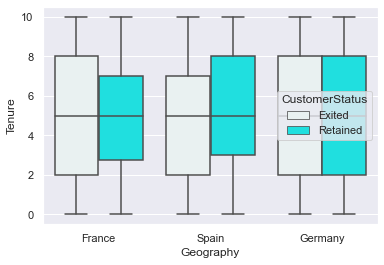

In [89]:

sns.boxplot(data=df,y='Tenure', x='Geography',
                  hue='CustomerStatus',              
                color = 'cyan')
           

<AxesSubplot:xlabel='CustomerStatus', ylabel='Age'>

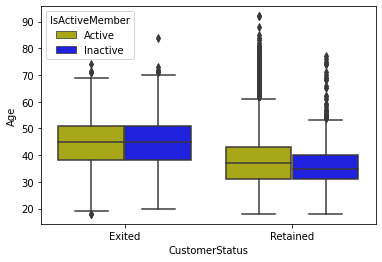

In [42]:
sns.boxplot(y='Age', x='CustomerStatus',
                  hue='IsActiveMember',              
                palette=["y", "b"],
            data=df)

<AxesSubplot:xlabel='CustomerStatus', ylabel='Age'>

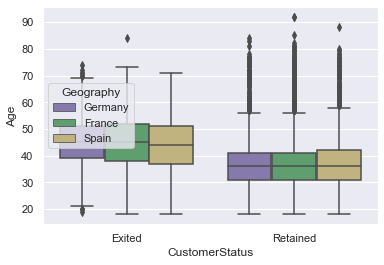

In [312]:
sns.boxplot(y='Age', x='CustomerStatus',
                  hue='Geography',              
                palette=["m", "g","y"],
            data=df)

### Test of Independence : t-test or Anova

t-test : Since Target 'CustomerStatus' & 'Gender' has 2 levels


In [108]:
from scipy.stats import ttest_ind

In [334]:
ttest_ind(*df.groupby('CustomerStatus')['Age'].apply(lambda x:list(x)))

Ttest_indResult(statistic=29.76681499437077, pvalue=1.2399313093427738e-186)

In [336]:
ttest_ind(*df.groupby('Gender')['Age'].apply(lambda x:list(x)))

Ttest_indResult(statistic=2.7551691441894026, pvalue=0.005876796622591764)

In [337]:
ttest_ind(*df.groupby('CustomerStatus')['Balance'].apply(lambda x:list(x)))

Ttest_indResult(statistic=11.936240300013841, pvalue=1.2755633191525477e-32)

### ANOVA TEST (Since 3 levels in Geography)

In [338]:
stats.f_oneway(*df.groupby('Geography')['Age'].apply(lambda x:list(x)))

F_onewayResult(statistic=12.106270732485987, pvalue=5.60622043878216e-06)

In [340]:
stats.f_oneway(*df.groupby('Geography')['Tenure'].apply(lambda x:list(x)))

F_onewayResult(statistic=0.07769214312039294, pvalue=0.925249785691543)

In [341]:
stats.f_oneway(*df.groupby('Geography')['Balance'].apply(lambda x:list(x)))

F_onewayResult(statistic=958.4254463368385, pvalue=0.0)

In [154]:
df.columns


Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'CustomerStatus'],
      dtype='object')

In [21]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (34.6 MB)
  Created wheel for pandas-profiling: filename=pandas_profiling-2.12.0-py2.py3-none-any.whl size=243837 sha256=805d3b40fe18200383e2233b82034ab5618c008a738c1281cb32925b7a3fad03
  Stored in directory: C:\Users\shahe\AppData\Local\Temp\pip-ephem-wheel-cache-6c7hl42g\wheels\64\b6\85\dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling


In [22]:
from pandas_profiling import ProfileReport

In [23]:
pandas_profiling.ProfileReport(df)

In [5]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [7]:

import sweetviz as sv


In [19]:
my_report = sv.analyze(df)
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
